# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook 

# Plotting Different Regimes

In [2]:
#### Import the required file and get a dataframe for analysis: 

wb = load_workbook(filename='US quarterly CPI _ growth rate.xlsx',  

                   read_only = True, 

                   data_only = True) 

ws = wb['FRED Graph'] 

# Read the cell values into a list of lists: 

data_rows = [] 

for row in ws['A12':'B127']:             # only a section of the entire file is reqd. 

    data_cols = [] 

    for cell in row: 

        data_cols.append(cell.value) 

    data_rows.append(data_cols) 

# Transform into dataframe: 

df_CPI = pd.DataFrame(data_rows) 

list_CPI = (df_CPI.iloc[:,1])[2:].tolist()

dx = [list_CPI[i+1]-list_CPI[i] for i in range(len(list_CPI)-1)]

df_GDP= pd.read_excel('macro data .xlsx',sheet_name = 'Quaterly GDP')

list_GDP = df_GDP['Value( $ Trillion) '].tolist()

dy = [list_GDP[i+1]-list_GDP[i] for i in range(len(list_GDP)-1)]

data_delta = pd.DataFrame(dx,columns=['change in x(inflation)'])

data_delta['change in y(GDP)'] = dy


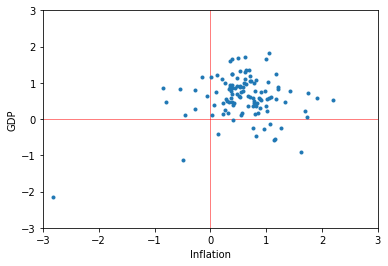

Text(0,0.5,'change in GDP')

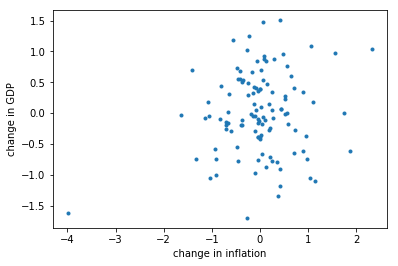

In [3]:
import warnings 
warnings.filterwarnings('ignore') 

plt.figure()
# Hold activation for multiple lines on same graph
plt.hold('on')
# Set x-axis range
plt.xlim((-3,3))
# Set y-axis range
plt.ylim((-3,3))
# Draw lines to split quadrants
plt.plot([0,0],[-3,3], linewidth=0.5, color='red' )
plt.plot([-3,3],[0,0], linewidth=0.5, color='red' )
plt.plot(list_CPI,list_GDP,'.')
plt.xlabel('Inflation')
plt.ylabel('GDP')
plt.show()

plt.plot(data_delta.iloc[:,0],data_delta.iloc[:,1],'.')
plt.xlabel('change in inflation')
plt.ylabel('change in GDP')



# Correlation of asset classes

In [4]:
def Daily_to_Yearly(data):
    # get the year column from Date 
    data['Year'] = pd.DatetimeIndex(data['Date']).year
    # get the end of the date per year
    data_yearly = pd.DataFrame(data.groupby(['Year'], sort = False).last())
    # Since 2018 does not have the date of December, we have to drop it
    data_yearly.drop(2018)
    # drop the year index
    data_yearly.reset_index(drop=True, inplace=True)
    
    return data_yearly

Gold=pd.read_excel('AssetClasses.xlsx',sheet_name='Gold')
Gold.columns=['Date','Values']
Gold_yearly=Daily_to_Yearly(Gold)
Gold_return=Gold_yearly['Values'].pct_change()

SP500=pd.read_excel('AssetClasses.xlsx',sheet_name='S&P500')
SP500.columns=['Date','Values']
SP500_yearly=Daily_to_Yearly(SP500)
SP500_return=SP500_yearly['Values'].pct_change()

Treasury=pd.read_excel('AssetClasses.xlsx',sheet_name='Treasuries')
Treasury.columns=['Date','Values']
Treasury_yearly=Daily_to_Yearly(Treasury)
Treasury_return=Treasury_yearly['Values'].pct_change()

USD=pd.read_excel('AssetClasses.xlsx',sheet_name='USD')
USD.columns=['Date','Values']
USD_yearly=Daily_to_Yearly(USD)
USD_return=USD_yearly['Values'].pct_change()

#create a dataframe
AssetClass=pd.DataFrame()
AssetClass['Gold']=Gold_return
AssetClass['S&P500']=SP500_return
AssetClass['Treasury']=Treasury_return
AssetClass['USD']=USD_return
AssetClass.dropna(inplace=True)

AssetCorr=AssetClass.corr()

print(AssetCorr)



              Gold    S&P500  Treasury       USD
Gold      1.000000 -0.163834 -0.271627  0.222293
S&P500   -0.163834  1.000000  0.515052  0.322871
Treasury -0.271627  0.515052  1.000000  0.373172
USD       0.222293  0.322871  0.373172  1.000000
